# Proyek Predictive Analytics: Dry Bean Dataset
- **Nama:** Rizma Agustin
- **Email:** mc200d5x2385@student.devacademy.id
- **ID Dicoding:** MC200D5X2385

# Import Library

In [2]:
!pip install scikit-learn==1.3.2 xgboost==1.7.6 --quiet

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Data Preparation

## Data Loading

In [4]:
df=pd.read_csv("/kaggle/input/dry-bean-dataset-classification/Dry_Bean_Dataset.csv")

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Preprocessing

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
df.duplicated() .sum()

68

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated() .sum()

0

In [12]:
# Reset index dan ambil hanya kolom numerik
df = df.reset_index(drop=True)
df_num = df.select_dtypes(['float64','int64'])

In [13]:
# Scaling fitur numerik
scaler = StandardScaler()
scaler.fit(df_num)

StandardScaler()

In [14]:
df_scaler = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

In [15]:
#Gantikan kolom numerik asli dengan yang sudah di-scaling
df[df_num.columns] = df_scaler

In [16]:
# Label encoding untuk target
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [17]:
print(df['Class'].value_counts())

Class
3    3546
6    2636
5    2027
4    1860
2    1630
0    1322
1     522
Name: count, dtype: int64


## EDA

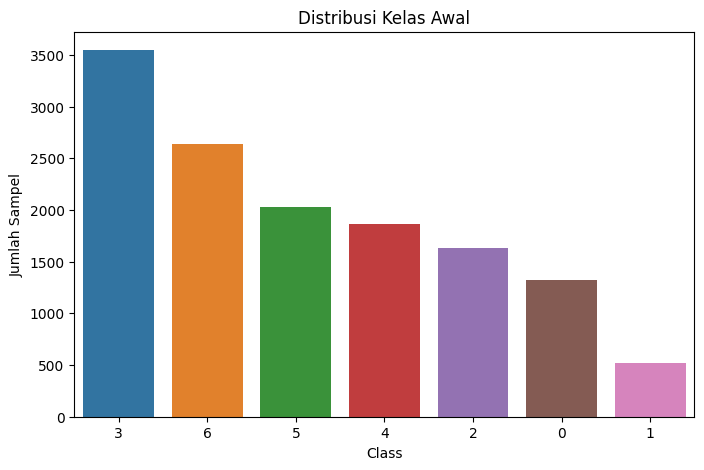

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title('Distribusi Kelas Awal')
plt.xlabel('Class')
plt.ylabel('Jumlah Sampel')
plt.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13543.0,3.357804e-17,1.000037,-1.110138,-0.570439,-0.288128,0.283537,6.858056
Perimeter,13543.0,-1.007341e-16,1.000037,-1.538122,-0.706814,-0.284552,0.568909,5.264550
MajorAxisLength,13543.0,-2.014682e-16,1.000037,-1.588400,-0.778602,-0.273769,0.657493,4.882690
MinorAxisLength,13543.0,5.708266e-16,1.000037,-1.772535,-0.587769,-0.219183,0.330302,5.723271
AspectRation,13543.0,1.678902e-16,1.000037,-2.268048,-0.613341,-0.127285,0.500908,3.462912
Eccentricity,13543.0,1.091286e-15,1.000037,-5.784847,-0.382902,0.148956,0.646201,1.753949
ConvexArea,13543.0,1.007341e-16,1.000037,-1.108596,-0.572828,-0.289714,0.287906,7.019803
EquivDiameter,13543.0,-5.708266e-16,1.000037,-1.547754,-0.642450,-0.249359,0.447281,5.334078
Extent,13543.0,-1.049314e-15,1.000037,-3.974761,-0.635388,0.205848,0.756462,2.377834
Solidity,13543.0,2.384041e-15,1.000037,-14.603724,-0.316922,0.244226,0.616531,1.618441


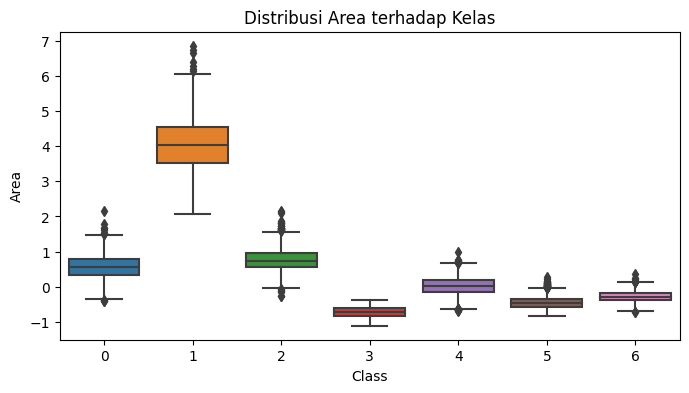

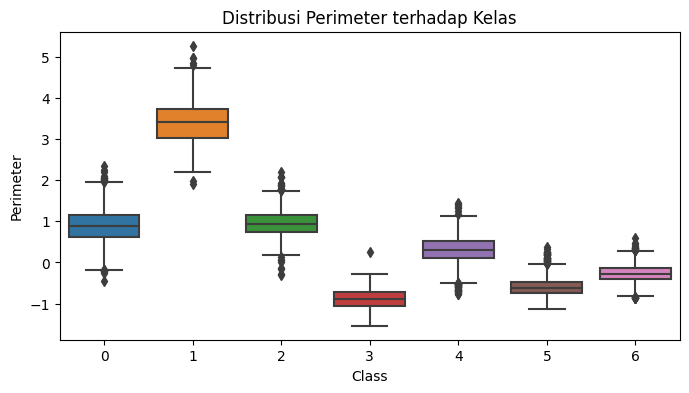

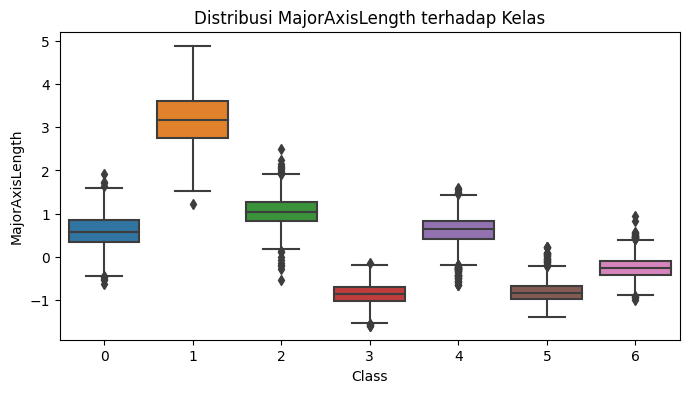

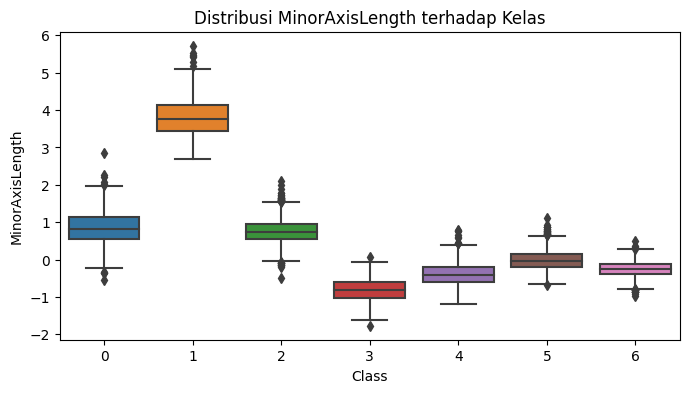

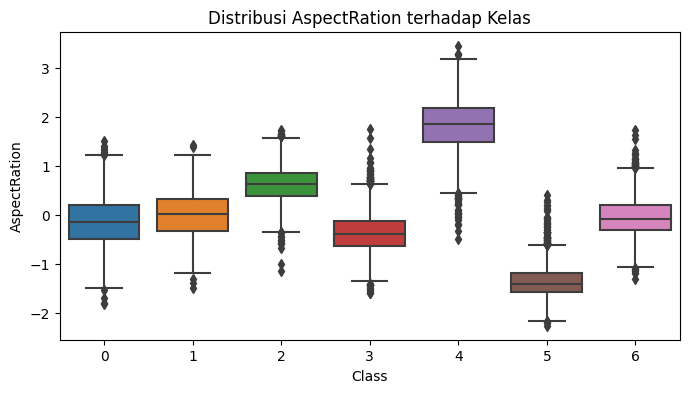

In [20]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols[:5]:  # hanya ambil 5 fitur pertama untuk efisiensi
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Distribusi {col} terhadap Kelas')
    plt.show()

## Balancing Data

In [21]:
df_for_resample=pd.concat([df[df['Class'] == 0],
                          df[df['Class'] == 1],
                          df[df['Class'] == 2],
                          df[df['Class'] == 3].sample(2500),
                          df[df['Class'] == 4],
                          df[df['Class'] == 5],
                          df[df['Class'] == 6].sample(2500)])

## Data Splitting

In [22]:
smote=SMOTE(random_state=1000)
x=df_for_resample.drop('Class', axis=1)
X_train_resampled, y_train_resampled=smote.fit_resample(x, df_for_resample.Class)

In [23]:
X_train_resampled['Class']=y_train_resampled
X_train_resampled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.393363,-0.182071,-0.242975,-0.561240,0.439077,0.604331,-0.378143,-0.391225,-1.239413,-2.278890,-1.524070,-0.517434,0.572763,-0.282028,-0.544074,0.555446,0
1,-0.393329,-0.444503,-0.428324,-0.341395,-0.272493,0.006588,-0.394160,-0.391178,-0.845892,0.116136,0.505365,0.185098,0.233248,0.182174,0.147616,0.613294,0
2,-0.375500,-0.210621,-0.619947,0.000350,-1.073505,-1.078118,-0.357904,-0.366781,0.432105,-2.602520,-1.154266,1.087592,-0.188581,0.831985,1.091651,-0.929791,0
3,-0.337734,-0.078278,-0.273769,-0.370871,0.062947,0.318052,-0.324831,-0.315598,-0.364627,-1.882185,-1.723551,-0.159771,0.276570,-0.106291,-0.196654,0.609136,0
4,-0.336951,-0.258796,-0.541834,-0.024383,-0.907962,-0.800199,-0.333610,-0.314545,0.332953,-0.510993,-0.426065,0.926051,-0.198634,0.658206,0.918091,0.743275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,-0.601162,-0.783502,-1.000551,-0.214372,-1.494810,-1.990509,-0.604727,-0.687875,0.838110,0.707281,1.160803,1.732603,0.048068,1.747418,1.804574,0.845178,5
17496,-0.517853,-0.678477,-0.788859,-0.248417,-1.067560,-1.067821,-0.523011,-0.566070,0.617795,0.893921,1.197882,1.135980,0.093896,1.072764,1.144060,0.887956,5
17497,-0.540311,-0.731312,-0.926197,-0.116666,-1.473422,-1.934948,-0.544817,-0.598632,0.308221,0.807890,1.431314,1.699264,-0.081191,1.604338,1.766944,0.795832,5
17498,-0.596801,-0.726947,-0.887032,-0.374380,-1.088475,-1.105192,-0.597712,-0.682135,0.421057,0.229803,0.661387,1.166137,0.274509,1.229231,1.176771,0.972712,5


In [24]:
X_train_resampled.Class.value_counts()

Class
0    2500
1    2500
2    2500
3    2500
4    2500
5    2500
6    2500
Name: count, dtype: int64

In [25]:
X,y=X_train_resampled.drop('Class',axis=1), X_train_resampled.Class
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.33, stratify=y, random_state=42)

## Modelling

In [26]:
def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'tree_method': 'gpu_hist',  
        'use_label_encoder': False,
        'verbosity': 0
    }

    model = XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return np.mean(scores)

In [27]:
# Inisialisasi dan jalankan tuning
study = optuna.create_study(direction='maximize', study_name='xgb_model_training')
study.optimize(objective, n_trials=20)

# Cetak hasil terbaik
print(f"Best trial average accuracy: {study.best_value:.4f}")
for key, value in study.best_params.items():
    print(f"{key}: {value}")

[I 2025-05-16 00:00:35,821] A new study created in memory with name: xgb_model_training
[I 2025-05-16 00:06:57,535] Trial 0 finished with value: 0.9466857142857142 and parameters: {'learning_rate': 0.03725809890196145, 'n_estimators': 849, 'reg_alpha': 4.568672310670417e-06, 'reg_lambda': 0.01707072956699468, 'max_depth': 16, 'colsample_bytree': 0.32168089772186986, 'subsample': 0.7728023083397527, 'min_child_weight': 5}. Best is trial 0 with value: 0.9466857142857142.
[I 2025-05-16 00:08:34,172] Trial 1 finished with value: 0.9360571428571429 and parameters: {'learning_rate': 0.015099560988552335, 'n_estimators': 170, 'reg_alpha': 1.3813854461912486e-06, 'reg_lambda': 2.8751362716790483e-06, 'max_depth': 10, 'colsample_bytree': 0.3102759809238612, 'subsample': 0.6233422481128498, 'min_child_weight': 5}. Best is trial 0 with value: 0.9466857142857142.
[I 2025-05-16 00:11:12,935] Trial 2 finished with value: 0.9462857142857143 and parameters: {'learning_rate': 0.04527714550808352, 'n_es

Best trial average accuracy: 0.9511
learning_rate: 0.021801529377415446
n_estimators: 952
reg_alpha: 1.1386311036046742e-05
reg_lambda: 1.5194874721688368e-05
max_depth: 13
colsample_bytree: 0.9578720773377138
subsample: 0.8747966874263459
min_child_weight: 2


In [28]:
best_params = study.best_params.copy()
best_params['objective'] = 'multi:softmax'

# pakai GPU:
best_params['tree_method'] = 'gpu_hist'
best_params['use_label_encoder'] = False
best_params['verbosity'] = 0


In [29]:
# Inisialisasi model dengan parameter terbaik
xgb = XGBClassifier(**best_params)

In [30]:
# Latih model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9578720773377138, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.021801529377415446,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=952, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

## Evaluasi Model

In [42]:
from sklearn.metrics import accuracy_score

# Hitung dan cetak ROC AUC Score
probas_test = xgb.predict_proba(X_test)
roc_auc_test = roc_auc_score(y_test, probas_test, multi_class='ovr')
y_pred_test = xgb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Test ROC AUC Score: {roc_auc_test:.4f}")
print(f"Test Accuracy: {acc_test:.4f}")

Test ROC AUC Score: 0.9972
Test Accuracy: 0.9505


In [43]:
# Evaluasi di data training untuk mengecek apakah terjadi overfitting
probas_train = xgb.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, probas_train, multi_class='ovr')
y_pred_train = xgb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

print(f"Training ROC AUC Score: {roc_auc_train:.4f}")
print(f"Training Accuracy: {acc_train:.4f}")

Training ROC AUC Score: 1.0000
Training Accuracy: 1.0000


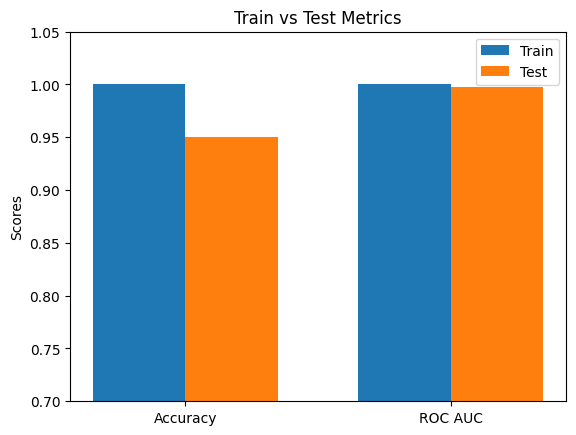

In [44]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'ROC AUC']
train_scores = [acc_train, roc_auc_train]
test_scores = [acc_test, roc_auc_test]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, train_scores, width, label='Train')
ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Train vs Test Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.7, 1.05)
plt.show()

### Cek Overfitting
Berdasarkan perbandingan performa model pada data pelatihan dan data pengujian dari XGBoost Fine Tuning:
| Metrik            | Training | Testing |
| ----------------- | -------- | ------- |
| **ROC AUC Score** | 1.0000   | 0.9972  |
| **Accuracy**      | 1.0000   | 0.9505  |

- Model tidak mengalami overfitting secara signifikan.
- Selisih antara akurasi dan ROC AUC di data pelatihan dan pengujian sangat kecil.
- Hal ini menunjukkan bahwa model tidak hanya menghafal data pelatihan, tetapi juga mampu menggeneralisasi dengan sangat baik ke data baru.
- Kualitas model juga terjaga meskipun dilakukan balancing data dan hyperparameter tuning.

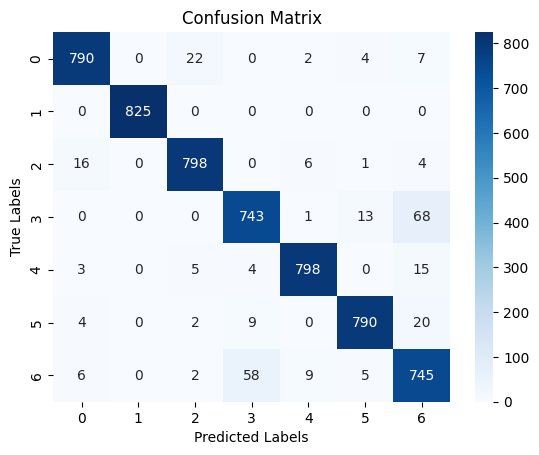

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))  # label disesuaikan otomatis
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       825
           1       1.00      1.00      1.00       825
           2       0.96      0.97      0.96       825
           3       0.91      0.90      0.91       825
           4       0.98      0.97      0.97       825
           5       0.97      0.96      0.96       825
           6       0.87      0.90      0.88       825

    accuracy                           0.95      5775
   macro avg       0.95      0.95      0.95      5775
weighted avg       0.95      0.95      0.95      5775



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "XGBoost Default": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probas = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, probas, multi_class='ovr')

    print(f"{name} - Accuracy: {acc:.4f}, ROC AUC: {auc:.4f}")

XGBoost Default - Accuracy: 0.9493, ROC AUC: 0.9971
Random Forest - Accuracy: 0.9435, ROC AUC: 0.9964
Logistic Regression - Accuracy: 0.9368, ROC AUC: 0.9964
SVM - Accuracy: 0.9415, ROC AUC: 0.9970
KNN - Accuracy: 0.9380, ROC AUC: 0.9893


## Performa model keseluruhan:

| Model               | Accuracy   | ROC AUC    |
| ------------------- | ---------- | ---------- |
| **XGBoost (Tuned)** | **0.9505** | **0.9972** |
| XGBoost Default     | 0.9493     | 0.9971     |
| Random Forest       | 0.9435     | 0.9964     |
| Logistic Regression | 0.9368     | 0.9964     |
| SVM                 | 0.9415     | 0.9970     |
| KNN                 | 0.9380     | 0.9893     |


In [49]:
!pip freeze > requirements.txt